In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import warnings


In [2]:
df = pd.read_csv('amazon_review.csv')

In [3]:
df.head(2)

,product_id,star_rating,review
0,B00IKPX4GY,5,Five Stars
1,B00IKPYKWG,3,Lots of ads Slow processing speed Occasionally...


In [49]:
import re

# Function to remove numbers from a string
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Apply the function to the 'review' column
df['review'] = df['review'].apply(remove_numbers)


In [50]:
corpus = df['review']

In [51]:
new_corpus = corpus.tolist()

In [52]:
type(new_corpus)
new_corpus

['Five Stars',
 'Lots of ads Slow processing speed Occasionally shuts down apps ...',
 'Well thought out device',
 'Not all apps/games we were looking forward to using were compatible with this tablet, over all we are enjoying it though,',
 'Five Stars',
 'Four Stars',
 'Not a bad product. Simple. Works well. Nothing fancy.',
 'Five Stars',
 'Everything works great, the menu system is awful',
 'Like looks and',
 'Five Stars',
 'Love',
 'Five Stars',
 'my new kindle',
 'Five Stars',
 'The promotional price was very good. I was worried as my last android device ...',
 'Five Stars',
 'Five Stars',
 'Highly Recommend',
 'Everything I expected and more. Have already gotten hours ...',
 'Three Stars',
 "Don't waste your money on this tablet",
 'Same sloppy OS same glitches still no flash compatability...',
 'I love it, I just wish I could download books ...',
 'Five Stars',
 'Three Stars',
 'Five Stars',
 'Three Stars',
 "I'm happy with my new Kindle Fire",
 'I was able to program the Kindle

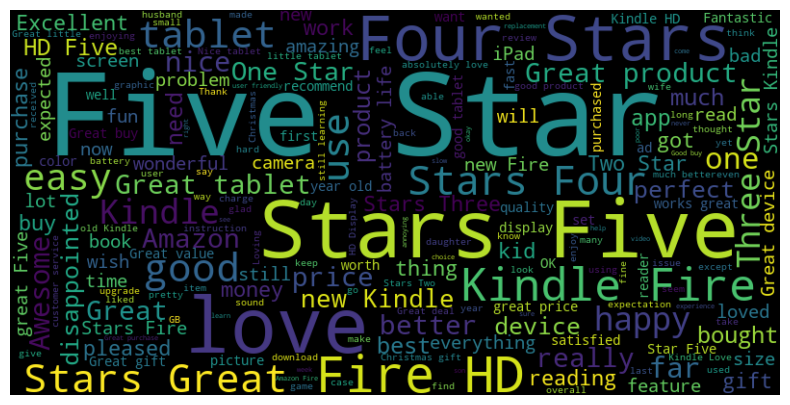

In [53]:
# Word cloud
from wordcloud import WordCloud
text = ' '.join(new_corpus)
wordcloud = WordCloud(width=800, height=400, background_color='Black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [54]:
# Display Standard punctuation
import string
punc = string.punctuation
set(punc)

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

In [55]:
# Removing Punctuation and splitting into list of words

translator = str.maketrans('', '', string.punctuation)
processed_corpus = []
for sentence in new_corpus:
    # Remove punctuation and split the sentence into a list of words
    words = sentence.translate(translator).split()
    
    processed_sentence = " ".join(words)
    processed_corpus.append(processed_sentence)
    

In [56]:
processed_corpus

['Five Stars',
 'Lots of ads Slow processing speed Occasionally shuts down apps',
 'Well thought out device',
 'Not all appsgames we were looking forward to using were compatible with this tablet over all we are enjoying it though',
 'Five Stars',
 'Four Stars',
 'Not a bad product Simple Works well Nothing fancy',
 'Five Stars',
 'Everything works great the menu system is awful',
 'Like looks and',
 'Five Stars',
 'Love',
 'Five Stars',
 'my new kindle',
 'Five Stars',
 'The promotional price was very good I was worried as my last android device',
 'Five Stars',
 'Five Stars',
 'Highly Recommend',
 'Everything I expected and more Have already gotten hours',
 'Three Stars',
 'Dont waste your money on this tablet',
 'Same sloppy OS same glitches still no flash compatability',
 'I love it I just wish I could download books',
 'Five Stars',
 'Three Stars',
 'Five Stars',
 'Three Stars',
 'Im happy with my new Kindle Fire',
 'I was able to program the Kindle easily on my own',
 'Five Stars

In [59]:
# Displaying standard stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [60]:

# Removing stopwords

after_stopword_corpus = []
for sentence in processed_corpus:
    # Remove punctuation and split the sentence into a list of words
    processed_sentence = " ".join([word for word in sentence.split() if word not in stop_words])
    after_stopword_corpus.append(processed_sentence)
    

In [61]:
after_stopword_corpus

['Five Stars',
 'Lots ads Slow processing speed Occasionally shuts apps',
 'Well thought device',
 'Not appsgames looking forward using compatible tablet enjoying though',
 'Five Stars',
 'Four Stars',
 'Not bad product Simple Works well Nothing fancy',
 'Five Stars',
 'Everything works great menu system awful',
 'Like looks',
 'Five Stars',
 'Love',
 'Five Stars',
 'new kindle',
 'Five Stars',
 'The promotional price good I worried last android device',
 'Five Stars',
 'Five Stars',
 'Highly Recommend',
 'Everything I expected Have already gotten hours',
 'Three Stars',
 'Dont waste money tablet',
 'Same sloppy OS glitches still flash compatability',
 'I love I wish I could download books',
 'Five Stars',
 'Three Stars',
 'Five Stars',
 'Three Stars',
 'Im happy new Kindle Fire',
 'I able program Kindle easily',
 'Five Stars',
 'Love My Kindle',
 'Five Stars',
 'Great product',
 'Five Stars',
 'Wont stay connected WiFi',
 'The unit came NO directions use',
 'Good kids',
 'A good purch

In [76]:
# Lower

def lower_sent(sent):
    return sent.lower() 

lower_sent(after_stopword_corpus[0])

'five stars'

In [82]:
# Length of sentence

def length_sent(sent):
    return len(sent.split())

length_sent(after_stopword_corpus[8])

6

In [88]:
len(after_stopword_corpus)

30846

In [97]:
# Bag of Words -  CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(after_stopword_corpus)
print("Bag of words - Vocab")
vocabulary = vectorizer.get_feature_names_out()
vocabulary


Bag of words - Vocab


array(['abc', 'abcmouse', 'abd', ..., 'zen', 'zero', 'zinio'],
      dtype=object)

In [99]:
len(vocabulary)

4745

In [100]:
print("Conversion of each document into vector using BOW \n",X.toarray())

Conversion of each document into vector using BOW 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [86]:
X.shape

(30846, 4745)

In [111]:
#bow_df = pd.DataFrame(X.toarray(), columns=[f'bow_{i+1}' for i in range(X.shape[1])])
#bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

bow_df = pd.DataFrame(X.toarray(), columns=[f'bow_{i+1}_{feature}' for i, feature in enumerate(vectorizer.get_feature_names_out())])


In [112]:
# Add the 'after_stopword_corpus' column to the existing DataFrame
df['after_stopword_corpus'] = after_stopword_corpus


In [113]:
# Concatenate the existing DataFrame with the BoW DataFrame and processed review
combined_df = pd.concat([df, bow_df], axis=1)


In [115]:
# Specify the desired filename (e.g., 'bow_vectors.csv')
filename = 'bow_vectors.csv'

# Save the DataFrame to a CSV file
combined_df.to_csv(filename, index=False)
